In [ ]:
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
data = pd.read_csv("diabetes.csv")
columns=['Pregnancies', 'Glucose',  'BloodPressure', 'SkinThickness','Insulin']
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,NaN,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
#part A
#Data is numeric (quantitative)
#All columns are discrete

In [ ]:
# calculating average value of each column
col1 = data["Pregnancies"].mean()
col2 = data["Glucose"].mean()
col3 = data["BloodPressure"].mean()
col4 = data["SkinThickness"].mean()
col5 = data["Insulin"].mean()


In [ ]:
#part B
# finding empty set and replacing it by average value
preg = data["Pregnancies"]
glu = data["Glucose"]
blood = data["BloodPressure"]
skin = data["SkinThickness"]
ins = data["Insulin"]


preg=preg.fillna(col1)
glu=glu.fillna(col2)
blood=blood.fillna(col3)
skin=skin.fillna(col4)
ins=ins.fillna(col5)


data["Pregnancies"]=preg
data["Glucose"]=glu
data["BloodPressure"]=blood
data["SkinThickness"]=skin
data["Insulin"]=ins


In [ ]:
#part C
# removing duplicate or redundant data
data=data.drop_duplicates()

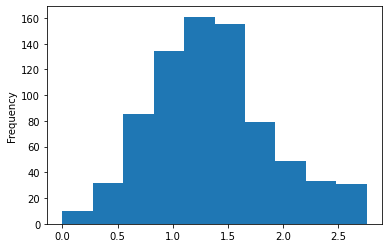

In [ ]:
#part D
#checking skewness
df=data.skew(axis = 1, skipna = True)
df.plot.hist()
#normally skewed

In [ ]:
#part E
# detecting outlier using z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data))
print(z)


      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  BMI  \
0    6.395592e-01  0.848876       0.149738       0.907860  0.693342  NaN   
1    8.469314e-01  1.124128       0.160650       0.531247  0.693342  NaN   
2    1.234155e+00  1.944989       0.264113       1.289051  0.693342  NaN   
3    1.320269e-16  0.998857       0.160650       0.154634  0.123382  NaN   
4    1.144230e+00  0.504383       1.505667       0.907860  0.766334  NaN   
..            ...       ...            ...            ...       ...  ...   
764  5.496333e-01  0.034621       0.046275       0.405709  0.693342  NaN   
765  3.422611e-01  0.003303       0.149738       0.154634  0.279776  NaN   
766  8.469314e-01  0.159891       0.471039       1.289051  0.693342  NaN   
767  8.469314e-01  0.873587       0.046275       0.656785  0.693342  NaN   
768  2.477471e-11  0.000000       0.000000       0.000000  0.000000  NaN   

     DiabetesPedigreeFunction  Age  Outcome  
0                         NaN  NaN      N

In [ ]:
print(np.where(z > 3))

(array([  7,   8,  13,  15,  49,  60,  75,  78,  81,  88, 111, 153, 159,
       172, 182, 186, 193, 220, 222, 228, 247, 261, 266, 269, 286, 298,
       300, 332, 336, 342, 347, 349, 357, 370, 409, 415, 426, 430, 435,
       453, 455, 468, 484, 486, 494, 502, 522, 533, 535, 579, 584, 589,
       601, 604, 619, 643, 645, 655, 695, 697, 703, 706, 753]), array([2, 4, 4, 2, 2, 2, 1, 2, 2, 0, 4, 4, 0, 2, 1, 4, 2, 4, 2, 4, 4, 2,
       2, 2, 4, 0, 2, 2, 2, 1, 2, 1, 2, 4, 4, 4, 2, 2, 2, 2, 0, 2, 2, 4,
       2, 1, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4]))


In [ ]:
#removing outlier by IQR method
import sklearn
from sklearn.datasets import load_boston
bos_hou = load_boston()

column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

Q1 = np.percentile(data, 25,interpolation = 'midpoint')

Q3 = np.percentile(data, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

# Upper bound
upper = np.where(data >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape: ", data.shape)


Old Shape:  (769, 9)
New Shape:  (769, 9)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#part F
# using min max scaler()
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names =data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df
#data is normally distributed and as all the values lie between the 0 and 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.226398,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0
767,0.058824,0.467337,0.573770,0.313131,0.000000,0.453055,0.101196,0.033333,0.0


In [ ]:
import math
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics

# load iris data set
dataset = load_iris()
a = dataset.data
b = np.zeros(150)


# take 1st column among 4 column of data set
for i in range (150):
    b[i]=a[i,1]

b=np.sort(b) #sort the array

# create bins
bin1=np.zeros((30,5))
bin2=np.zeros((30,5))
bin3=np.zeros((30,5))

# Bin mean
for i in range (0,150,5):
    k=int(i/5)
    mean=(b[i] + b[i+1] + b[i+2] + b[i+3] + b[i+4])/5
    for j in range(5):
        bin1[k,j]=mean
print("Bin Mean: \n",bin1)

# Bin boundaries
for i in range (0,150,5):
    k=int(i/5)
    for j in range (5):
        if (b[i+j]-b[i]) < (b[i+4]-b[i+j]):
            bin2[k,j]=b[i]
        else:
            bin2[k,j]=b[i+4]
print("Bin Boundaries: \n",bin2)

# Bin median
for i in range (0,150,5):
    k=int(i/5)
    for j in range (5):
        bin3[k,j]=b[i+2]
print("Bin Median: \n",bin3)

Bin Mean: 
 [[2.18 2.18 2.18 2.18 2.18]
 [2.34 2.34 2.34 2.34 2.34]
 [2.48 2.48 2.48 2.48 2.48]
 [2.52 2.52 2.52 2.52 2.52]
 [2.62 2.62 2.62 2.62 2.62]
 [2.7  2.7  2.7  2.7  2.7 ]
 [2.74 2.74 2.74 2.74 2.74]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.86 2.86 2.86 2.86 2.86]
 [2.9  2.9  2.9  2.9  2.9 ]
 [2.96 2.96 2.96 2.96 2.96]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.04 3.04 3.04 3.04 3.04]
 [3.1  3.1  3.1  3.1  3.1 ]
 [3.12 3.12 3.12 3.12 3.12]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.26 3.26 3.26 3.26 3.26]
 [3.34 3.34 3.34 3.34 3.34]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.5  3.5  3.5  3.5  3.5 ]
 [3.58 3.58 3.58 3.58 3.58]
 [3.74 3.74 3.74 3.74 3.74]
 [3.82 3.82 3.82 3.82 3.82]
 [4.12 4.12 4.12 4.12 4.12]]
Bin Boundaries: 
 [[2.  2.3 2.3 2.3 2.3]
 [2.3 2.3 2.3 2.4 2.4]
 [2.4 2.5 2.5 2.5 2.5]
 [2.5 2.5 2.5 2.5 2.6]
 [2.6 2.6 2.6 2.6 2.7]
 [2.7 2.7 2.7 

In [ ]:
#Q3
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
num = int(len(data)*0.50)
data = data[:num]
x = data[data.columns[0:9]]
data_y =x['Outcome'].values.reshape(-1, 1)
data_x=x['BMI'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.25, random_state=0)
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)
pred = logisticReg.predict(x_test)
print("Predicted Labels:",pred)


Predicted Labels: [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


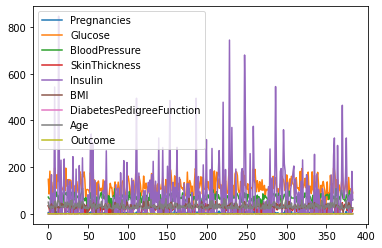

In [ ]:
data.plot()